In [1]:
#Brandon Coleman
#5-17-2019
#Data Analytics Bootcamp
#Homework 5 - MatPlotLib - Pyber


#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#                O B S E R V A T I O N S
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#
# 1. There's a correlation between density (on a scale from urban to rural) and usage metrics of pyber. 
#    Urban city types account for the majority share of rides, fares, and drivers. With a higher number
#    of rides, more drivers, and a larger user base to keep average fares low.
#
# 2. Rural areas tend to have higher fare prices on average, fewer rides, and fewer drivers. It can probably
#    be deduced that trips are less frequent and longer.
#
# 3. Suburban areas have fewer drivers than riders. It can be assumed because of a more homogenous, population base,
#    and a higher share of car owners than Urban areas. Maybe if driving for Pyber were enough to live in suburbs
#    the number of drivers and rides would be more equitable. Suburbs, typically being zoned for single-use,
#    means less points of destination and therefore less opportunity for pyber drivers. Ultimately urban areas
#    are where Pyber drivers gravitate to.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how="left", on="city")
# Display the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

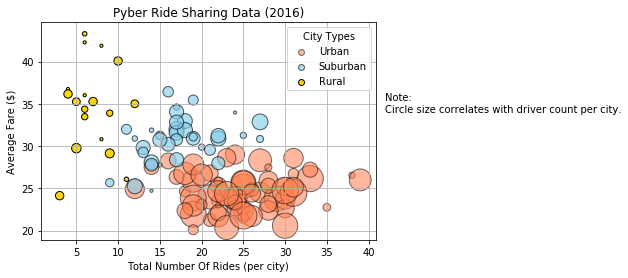

In [3]:
# Obtain the x and y coordinates for each of the three city types

# separate dataframes for city types
urban_df = combined_df[combined_df.type == "Urban"]
suburban_df = combined_df[combined_df.type == "Suburban"]
rural_df = combined_df[combined_df.type == "Rural"]

# group urban dataframe by city, get x, y coordinates, and size (driver_count)
urban_city_groupby = urban_df.groupby("city")
x_urban_rides = urban_city_groupby["ride_id"].count()
y_urban_fare = urban_city_groupby["fare"].mean()
s_urban_drivers = urban_city_groupby["driver_count"].mean()

# group suburban dataframe by city, get x, y coordinates, and size (driver_count)
suburb_city_groupby = suburban_df.groupby("city")
x_suburb_rides = suburb_city_groupby["ride_id"].count()
y_suburb_fare = suburb_city_groupby["fare"].mean()
s_suburb_drivers = suburb_city_groupby["driver_count"].mean()

# group rural dataframe by city, get x, y coordinates, and size (driver_count)
rural_city_groupby = rural_df.groupby("city")
x_rural_rides = rural_city_groupby["ride_id"].count()
y_rural_fare = rural_city_groupby["fare"].mean()
s_rural_drivers = rural_city_groupby["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban_rides, y_urban_fare, label="Urban", s=s_urban_drivers*10, marker="o", color="coral", edgecolor="black", alpha=0.55,linewidths=1)
plt.scatter(x_suburb_rides, y_suburb_fare, label="Suburban", s=s_suburb_drivers*10, marker="o", color = "skyblue", edgecolor="black", alpha=0.65, linewidths=1)
plt.scatter(x_rural_rides, y_rural_fare, label="Rural", s=s_rural_drivers*10, marker="o", color="gold", edgecolor="black", alpha=1, linewidths=1)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number Of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
lgnd = plt.legend(title="City Types")

#set size of markers in legend
for handle in lgnd.legendHandles:
    handle.set_sizes([35.0])

# Incorporate a text label regarding circle size
plt.text(42,34, "Note:\nCircle size correlates with driver count per city.", fontsize=10)
# Save Figure
plt.savefig("data/Pyber_Data.png", bbox_inches="tight")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

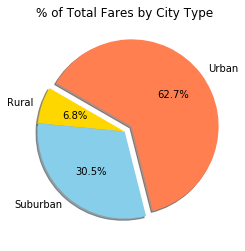

In [5]:
# Calculate Type Percents
groupby_type = combined_df.groupby("type")
fares_type_sum = groupby_type["fare"].sum()
# Build Pie Chart
plt.title("% of Total Fares by City Type")
labels=["Rural", "Suburban", "Urban"]
colors=["gold","skyblue","coral"]
plt.pie(fares_type_sum, colors=colors, labels=labels, startangle=150, shadow=True, explode=(0, 0, 0.1), autopct='%1.1f%%')
# Save Figure

plt.savefig("data/FaresByCityType.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

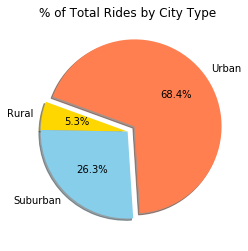

In [7]:
# Calculate Ride Percents
rides_by_type = groupby_type["ride_id"].count()

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(rides_by_type, colors=colors, labels=labels, startangle=160, shadow=True, explode=(0,0,0.1), autopct='%1.1f%%')

# Save Figure
plt.savefig("data/RidesByCityType.png")


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

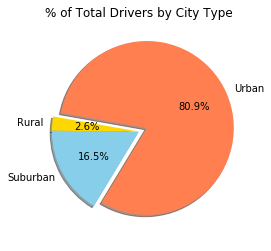

In [9]:
# Calculate Driver Percents

groupcitydf = city_df.groupby("type")
drivers_by_type = groupcitydf["driver_count"].sum()

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_type, labels=labels, colors=colors, startangle=170, explode=(0,0,0.1), shadow=True, autopct='%1.1f%%')
# Save Figure
plt.savefig("data/DriversByCityType.png")

In [10]:
# Show Figure
plt.show()